In [1]:
import tensorflow as tf
import numpy as np
keras  = tf.keras

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [5]:
len(test_data)

2246

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])   

565248/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)  

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels)  

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 2.5735 - accuracy: 0.4763 - val_loss: 1.7108 - val_accuracy: 0.6130
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.3929 - accuracy: 0.6992 - val_loss: 1.2906 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0455 - accuracy: 0.7694 - val_loss: 1.1165 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8255 - accuracy: 0.8215 - val_loss: 1.0171 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 62ms/step - loss: 0.6584 - accuracy: 0.8651 - val_loss: 0.9548 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5306 - accuracy: 0.8889 - val_loss: 0.9106 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4260 - accuracy: 0.9109 - val_loss: 0.8849 - val_accuracy: 0.8160
Epoch 8/20
16

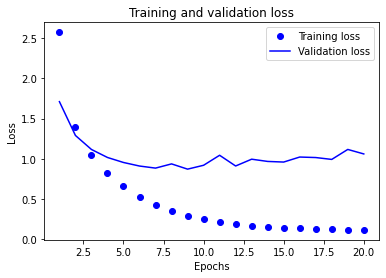

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

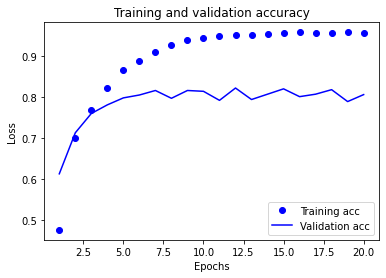

In [19]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 57ms/step - loss: 2.5771 - accuracy: 0.5388 - val_loss: 1.7069 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 1s 66ms/step - loss: 1.4051 - accuracy: 0.7102 - val_loss: 1.2947 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 1s 78ms/step - loss: 1.0425 - accuracy: 0.7724 - val_loss: 1.1239 - val_accuracy: 0.7590
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.8169 - accuracy: 0.8239 - val_loss: 1.0103 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.6500 - accuracy: 0.8624 - val_loss: 0.9678 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5233 - accuracy: 0.8901 - val_loss: 0.9248 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4199 - accuracy: 0.9109 - val_loss: 0.9235 - val_accuracy: 0.7970
Epoch 8/9
16/16 [===

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions[0].shape

(46,)

In [23]:
np.argmax(predictions[5])

3

In [26]:
test_labels[5]

3